# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [94]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [95]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [96]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [97]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [98]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.870226
b    0.190500
c   -1.268610
d    0.469865
e   -0.284376
dtype: float64
a         NaN
b    0.381000
c   -2.537220
d    0.939729
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [99]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=15, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)

2023-11-22
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00', '2023-11-29 10:45:00',
               '2023-11-30 10:45:00', '2023-12-01 10:45:00',
               '2023-12-02 10:45:00', '2023-12-03 10:45:00',
               '2023-12-04 10:45:00', '2023-12-05 10:45:00',
               '2023-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [100]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 0))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2260/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
9178790400000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [101]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time


2023-11-22 10:45:00    12.410980
2023-11-23 10:45:00     8.223517
2023-11-24 10:45:00    11.353930
2023-11-25 10:45:00    10.065754
Freq: D, dtype: float64 

2023-11-22 10:45:00    12.410980
2023-11-23 10:45:00     8.223517
2023-11-24 10:45:00    11.353930
2023-11-25 10:45:00    10.065754
2023-11-26 10:45:00     9.544805
2023-11-27 10:45:00    12.451920
2023-11-28 10:45:00     8.650553
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [102]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [103]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2023-11-22 10:45:00,-0.831543,-0.989104,1.350335,-1.397946
2023-11-22 11:45:00,1.143704,0.499616,0.751454,0.607888
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,-0.506877
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,0.088657
2023-11-22 14:45:00,0.399770,0.843729,0.168517,0.309750
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,1.381332
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,-0.212317
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,0.605201
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,1.057347
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,0.453654


or by means of a dictionary:


In [104]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [105]:
df.head(2)

,A,B,C,D
2023-11-22 10:45:00,-0.831543,-0.989104,1.350335,-1.397946
2023-11-22 11:45:00,1.143704,0.499616,0.751454,0.607888


In [106]:
df.tail(4)

,A,B,C,D
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,-0.212317
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,0.605201
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,1.057347
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,0.453654


In [107]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [108]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [109]:
df.values

array([[-0.83154342, -0.98910366,  1.35033458, -1.39794561],
       [ 1.14370402,  0.4996155 ,  0.75145353,  0.60788781],
       [ 0.22888465,  1.29830189, -0.25838664, -0.50687687],
       [ 0.90692453, -1.02908153, -0.30303533,  0.08865673],
       [ 0.39977047,  0.8437288 ,  0.16851675,  0.30975007],
       [ 0.22012687, -0.37830926, -0.40137581,  1.38133197],
       [ 0.25613647, -1.23463487, -1.76869037, -0.21231681],
       [ 0.40752691,  0.35840398, -0.22379046,  0.60520063],
       [-0.29583899, -1.34657551,  0.0962845 ,  1.05734696],
       [ 0.24850775,  0.71820954, -1.97473107,  0.4536537 ]])

In [110]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.268420,-0.125945,-0.256342,0.238669
std,0.552083,0.980407,1.009194,0.799867
min,-0.831543,-1.346576,-1.974731,-1.397946
25%,0.222316,-1.019087,-0.376791,-0.137073
50%,0.252322,-0.009953,-0.241089,0.381702
75%,0.405588,0.663561,0.150459,0.607216
max,1.143704,1.298302,1.350335,1.381332


In [111]:
df.T

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,-0.831543,1.143704,0.228885,0.906925,0.399770,0.220127,0.256136,0.407527,-0.295839,0.248508
B,-0.989104,0.499616,1.298302,-1.029082,0.843729,-0.378309,-1.234635,0.358404,-1.346576,0.718210
C,1.350335,0.751454,-0.258387,-0.303035,0.168517,-0.401376,-1.768690,-0.223790,0.096285,-1.974731
D,-1.397946,0.607888,-0.506877,0.088657,0.309750,1.381332,-0.212317,0.605201,1.057347,0.453654


In [112]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,0.453654
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,1.057347
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,0.605201
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,-0.212317
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,1.381332
2023-11-22 14:45:00,0.399770,0.843729,0.168517,0.309750
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,0.088657
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,-0.506877
2023-11-22 11:45:00,1.143704,0.499616,0.751454,0.607888
2023-11-22 10:45:00,-0.831543,-0.989104,1.350335,-1.397946


In [113]:
df.sort_values(by="C")

,A,B,C,D
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,0.453654
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,-0.212317
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,1.381332
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,0.088657
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,-0.506877
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,0.605201
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,1.057347
2023-11-22 14:45:00,0.399770,0.843729,0.168517,0.309750
2023-11-22 11:45:00,1.143704,0.499616,0.751454,0.607888
2023-11-22 10:45:00,-0.831543,-0.989104,1.350335,-1.397946


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [114]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2023-11-22 10:45:00   -0.831543
2023-11-22 11:45:00    1.143704
2023-11-22 12:45:00    0.228885
2023-11-22 13:45:00    0.906925
2023-11-22 14:45:00    0.399770
2023-11-22 15:45:00    0.220127
2023-11-22 16:45:00    0.256136
2023-11-22 17:45:00    0.407527
2023-11-22 18:45:00   -0.295839
2023-11-22 19:45:00    0.248508
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00   -0.831543
2023-11-22 11:45:00    1.143704
2023-11-22 12:45:00    0.228885
2023-11-22 13:45:00    0.906925
2023-11-22 14:45:00    0.399770
2023-11-22 15:45:00    0.220127
2023-11-22 16:45:00    0.256136
2023-11-22 17:45:00    0.407527
2023-11-22 18:45:00   -0.295839
2023-11-22 19:45:00    0.248508
Freq: H, Name: A, dtype: float64


In [115]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00 -0.831543 -0.989104  1.350335 -1.397946
2023-11-22 11:45:00  1.143704  0.499616  0.751454  0.607888
2023-11-22 12:45:00  0.228885  1.298302 -0.258387 -0.506877
                            A         B         C         D
2023-11-22 10:45:00 -0.831543 -0.989104  1.350335 -1.397946
2023-11-22 11:45:00  1.143704  0.499616  0.751454  0.607888
2023-11-22 12:45:00  0.228885  1.298302 -0.258387 -0.506877


### Selection by label

In [116]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.831543
B   -0.989104
C    1.350335
D   -1.397946
Name: 2023-11-22 10:45:00, dtype: float64

In [117]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,-0.831543,-0.989104
2023-11-22 11:45:00,1.143704,0.499616
2023-11-22 12:45:00,0.228885,1.298302
2023-11-22 13:45:00,0.906925,-1.029082
2023-11-22 14:45:00,0.399770,0.843729
2023-11-22 15:45:00,0.220127,-0.378309
2023-11-22 16:45:00,0.256136,-1.234635
2023-11-22 17:45:00,0.407527,0.358404
2023-11-22 18:45:00,-0.295839,-1.346576
2023-11-22 19:45:00,0.248508,0.718210


In [118]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,0.399770,0.843729
2023-11-22 15:45:00,0.220127,-0.378309
2023-11-22 16:45:00,0.256136,-1.234635


In [119]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.1437040208677354
1.1437040208677354


### Selecting by position

In [120]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.906925
B   -1.029082
C   -0.303035
D    0.088657
Name: 2023-11-22 13:45:00, dtype: float64 

                            A         B
2023-11-22 13:45:00  0.906925 -1.029082
2023-11-22 14:45:00  0.399770  0.843729


In [121]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,1.143704,0.751454
2023-11-22 12:45:00,0.228885,-0.258387
2023-11-22 14:45:00,0.399770,0.168517


In [122]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00  1.143704  0.499616  0.751454  0.607888
2023-11-22 12:45:00  0.228885  1.298302 -0.258387 -0.506877 

                            B         C
2023-11-22 10:45:00 -0.989104  1.350335
2023-11-22 11:45:00  0.499616  0.751454
2023-11-22 12:45:00  1.298302 -0.258387
2023-11-22 13:45:00 -1.029082 -0.303035
2023-11-22 14:45:00  0.843729  0.168517
2023-11-22 15:45:00 -0.378309 -0.401376
2023-11-22 16:45:00 -1.234635 -1.768690
2023-11-22 17:45:00  0.358404 -0.223790
2023-11-22 18:45:00 -1.346576  0.096285
2023-11-22 19:45:00  0.718210 -1.974731


In [123]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


0.49961550341544514

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [124]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 11:45:00,1.143704,0.499616,0.751454,0.607888
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,-0.506877
2023-11-22 14:45:00,0.399770,0.843729,0.168517,0.309750
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,0.605201
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,0.453654


In [125]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2023-11-22 10:45:00,NaN,NaN,1.350335,NaN
2023-11-22 11:45:00,1.143704,0.499616,0.751454,0.607888
2023-11-22 12:45:00,0.228885,1.298302,NaN,NaN
2023-11-22 13:45:00,0.906925,NaN,NaN,0.088657
2023-11-22 14:45:00,0.399770,0.843729,0.168517,0.309750
2023-11-22 15:45:00,0.220127,NaN,NaN,1.381332
2023-11-22 16:45:00,0.256136,NaN,NaN,NaN
2023-11-22 17:45:00,0.407527,0.358404,NaN,0.605201
2023-11-22 18:45:00,NaN,NaN,0.096285,1.057347
2023-11-22 19:45:00,0.248508,0.718210,NaN,0.453654


### Setting

Combination of selection and setting of values

In [126]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = df['A']-df['B']

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [161]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2,0.999937
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,5.0,-1.069417,4,0.999826
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,5.0,1.936006,6,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,-0.443958,8,0.999970
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,5.0,0.598436,10,0.999945
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,5.0,1.490771,12,0.999662
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,5.0,0.049123,14,1.000000
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,5.0,1.050737,16,0.999832
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,5.0,-0.469702,18,0.999966


In [128]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2,0.999937
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,5.0,-1.069417,4,0.999826
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,5.0,1.936006,6,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,-0.443958,8,0.999970
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,5.0,0.598436,10,0.999945
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,5.0,1.490771,12,0.999662
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,5.0,0.049123,14,1.000000
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,5.0,1.050737,16,0.999832
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,5.0,-0.469702,18,0.999966


In [129]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,-1.350335,-5.0,-0.989104,0,-0.999851
2023-11-22 11:45:00,-1.143704,-0.499616,-0.751454,-5.0,-0.644089,-2,-0.999937
2023-11-22 12:45:00,-0.228885,-1.298302,-0.258387,-5.0,-1.069417,-4,-0.999826
2023-11-22 13:45:00,-0.906925,-1.029082,-0.303035,-5.0,-1.936006,-6,-0.999429
2023-11-22 14:45:00,-0.399770,-0.843729,-0.168517,-5.0,-0.443958,-8,-0.999970
2023-11-22 15:45:00,-0.220127,-0.378309,-0.401376,-5.0,-0.598436,-10,-0.999945
2023-11-22 16:45:00,-0.256136,-1.234635,-1.768690,-5.0,-1.490771,-12,-0.999662
2023-11-22 17:45:00,-0.407527,-0.358404,-0.223790,-5.0,-0.049123,-14,-1.000000
2023-11-22 18:45:00,-0.295839,-1.346576,-0.096285,-5.0,-1.050737,-16,-0.999832
2023-11-22 19:45:00,-0.248508,-0.718210,-1.974731,-5.0,-0.469702,-18,-0.999966


In [130]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2,0.999937
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,5.0,-1.069417,4,0.999826
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,5.0,1.936006,6,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,-0.443958,8,0.999970
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,5.0,0.598436,10,0.999945
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,5.0,1.490771,12,0.999662
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,5.0,0.049123,14,1.000000
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,5.0,1.050737,16,0.999832
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,5.0,-0.469702,18,0.999966


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [131]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,0.999937
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,5.0,-1.069417,0.999826
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,5.0,1.936006,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,-0.443958,0.999970
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,5.0,0.598436,0.999945
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,5.0,1.490771,0.999662
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,5.0,0.049123,1.000000
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,5.0,1.050737,0.999832
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,5.0,-0.469702,0.999966


In [132]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0,0.999851
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,5.0,0.598436,10,0.999945
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,5.0,1.490771,12,0.999662
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,5.0,0.049123,14,1.000000
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,5.0,1.050737,16,0.999832
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,5.0,-0.469702,18,0.999966


In [133]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2,0.999937
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,5.0,-1.069417,4,0.999826
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,5.0,1.936006,6,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,-0.443958,8,0.999970
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,5.0,0.598436,10,0.999945
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,5.0,1.490771,12,0.999662
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,5.0,0.049123,14,1.000000
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,5.0,1.050737,16,0.999832
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,5.0,-0.469702,18,0.999966


In [134]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2,0.999937
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,5.0,-1.069417,4,0.999826
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,5.0,1.936006,6,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,-0.443958,8,0.999970
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,5.0,0.598436,10,0.999945
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,5.0,1.490771,12,0.999662
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,5.0,0.049123,14,1.000000
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,5.0,-0.469702,18,0.999966


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [135]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,1.350335,5.0,0.989104,NaN,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2.0,0.999937
2023-11-22 12:45:00,0.228885,1.298302,NaN,5.0,NaN,4.0,0.999826
2023-11-22 13:45:00,0.906925,NaN,NaN,5.0,1.936006,6.0,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,NaN,8.0,0.999970
2023-11-22 15:45:00,0.220127,NaN,NaN,5.0,0.598436,10.0,0.999945
2023-11-22 16:45:00,0.256136,NaN,NaN,5.0,1.490771,12.0,0.999662
2023-11-22 17:45:00,0.407527,0.358404,NaN,5.0,0.049123,14.0,1.000000
2023-11-22 18:45:00,NaN,NaN,0.096285,5.0,1.050737,16.0,0.999832
2023-11-22 19:45:00,0.248508,0.718210,NaN,5.0,NaN,18.0,0.999966


In [136]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2.0,0.999937


In [137]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,True,False,False,False,True,False
2023-11-22 11:45:00,False,False,False,False,False,False,False
2023-11-22 12:45:00,False,False,True,False,True,False,False
2023-11-22 13:45:00,False,True,True,False,False,False,False
2023-11-22 14:45:00,False,False,False,False,True,False,False
2023-11-22 15:45:00,False,True,True,False,False,False,False
2023-11-22 16:45:00,False,True,True,False,False,False,False
2023-11-22 17:45:00,False,False,True,False,False,False,False
2023-11-22 18:45:00,True,True,False,False,False,False,False
2023-11-22 19:45:00,False,False,True,False,True,False,False


In [138]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.000000,1.350335,5.0,0.989104,0.0,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2.0,0.999937
2023-11-22 12:45:00,0.228885,1.298302,0.000000,5.0,0.000000,4.0,0.999826
2023-11-22 13:45:00,0.906925,0.000000,0.000000,5.0,1.936006,6.0,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,0.000000,8.0,0.999970
2023-11-22 15:45:00,0.220127,0.000000,0.000000,5.0,0.598436,10.0,0.999945
2023-11-22 16:45:00,0.256136,0.000000,0.000000,5.0,1.490771,12.0,0.999662
2023-11-22 17:45:00,0.407527,0.358404,0.000000,5.0,0.049123,14.0,1.000000
2023-11-22 18:45:00,0.000000,0.000000,0.096285,5.0,1.050737,16.0,0.999832
2023-11-22 19:45:00,0.248508,0.718210,0.000000,5.0,0.000000,18.0,0.999966


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [139]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,1.350335,5.0,0.989104,NaN,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2.0,0.999937
2023-11-22 12:45:00,0.228885,1.298302,0.751454,5.0,0.644089,4.0,0.999826
2023-11-22 13:45:00,0.906925,1.298302,0.751454,5.0,1.936006,6.0,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,1.936006,8.0,0.999970
2023-11-22 15:45:00,0.220127,0.843729,0.168517,5.0,0.598436,10.0,0.999945
2023-11-22 16:45:00,0.256136,0.843729,0.168517,5.0,1.490771,12.0,0.999662
2023-11-22 17:45:00,0.407527,0.358404,0.168517,5.0,0.049123,14.0,1.000000
2023-11-22 18:45:00,0.407527,0.358404,0.096285,5.0,1.050737,16.0,0.999832
2023-11-22 19:45:00,0.248508,0.718210,0.096285,5.0,1.050737,18.0,0.999966


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [140]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.351574
B         -0.125945
C         -0.256342
D          5.000000
E          0.477519
E prime    9.000000
cosine     0.999842
dtype: float64 

2023-11-22 10:45:00    1.050027
2023-11-22 11:45:00    1.576971
2023-11-22 12:45:00    1.457030
2023-11-22 13:45:00    1.930035
2023-11-22 14:45:00    2.138290
2023-11-22 15:45:00    2.291260
2023-11-22 16:45:00    2.391892
2023-11-22 17:45:00    2.941609
2023-11-22 18:45:00    3.072063
2023-11-22 19:45:00    3.217464
Freq: H, dtype: float64 



In [141]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0,0.999851
2023-11-22 11:45:00,1.143704,-0.489488,2.101788,10.0,1.633192,2,1.999788
2023-11-22 12:45:00,1.372589,0.808814,1.843401,15.0,0.563775,6,2.999614
2023-11-22 13:45:00,2.279513,-0.220268,1.540366,20.0,2.499781,12,3.999043
2023-11-22 14:45:00,2.679284,0.623461,1.708883,25.0,2.055823,20,4.999013
2023-11-22 15:45:00,2.899411,0.245152,1.307507,30.0,2.654259,30,5.998958
2023-11-22 16:45:00,3.155547,-0.989483,-0.461183,35.0,4.145030,42,6.998620
2023-11-22 17:45:00,3.563074,-0.631079,-0.684974,40.0,4.194153,56,7.998619
2023-11-22 18:45:00,3.267235,-1.977655,-0.588689,45.0,5.244890,72,8.998451
2023-11-22 19:45:00,3.515743,-1.259445,-2.563420,50.0,4.775188,90,9.998418


In [142]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.989104,1.350335,5.0,0.989104,0,0.999851
2023-11-22 11:45:00,1.143704,0.499616,0.751454,5.0,0.644089,2,0.999937
2023-11-22 12:45:00,0.228885,1.298302,-0.258387,5.0,-1.069417,4,0.999826
2023-11-22 13:45:00,0.906925,-1.029082,-0.303035,5.0,1.936006,6,0.999429
2023-11-22 14:45:00,0.399770,0.843729,0.168517,5.0,-0.443958,8,0.999970
2023-11-22 15:45:00,0.220127,-0.378309,-0.401376,5.0,0.598436,10,0.999945
2023-11-22 16:45:00,0.256136,-1.234635,-1.768690,5.0,1.490771,12,0.999662
2023-11-22 17:45:00,0.407527,0.358404,-0.223790,5.0,0.049123,14,1.000000
2023-11-22 18:45:00,-0.295839,-1.346576,0.096285,5.0,1.050737,16,0.999832
2023-11-22 19:45:00,0.248508,0.718210,-1.974731,5.0,-0.469702,18,0.999966


In [143]:
df.apply(lambda x: x.max() - x.min())

A           1.439543
B           2.644877
C           3.325066
D           0.000000
E           3.005423
E prime    18.000000
cosine      0.000570
dtype: float64

In [144]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00   -0.989104
2023-11-22 11:45:00    1.643320
2023-11-22 12:45:00    1.527187
2023-11-22 13:45:00   -0.122157
2023-11-22 14:45:00    1.243499
2023-11-22 15:45:00   -0.158182
2023-11-22 16:45:00   -0.978498
2023-11-22 17:45:00    0.765931
2023-11-22 18:45:00   -1.642415
2023-11-22 19:45:00    0.966717
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [145]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [146]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [147]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [148]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [149]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.912451,-1.183564,-0.929367,-0.451368
1,-0.579011,-1.378817,0.687443,0.025691
2,-0.753761,1.074268,0.327688,-1.283639
3,-0.926862,0.075934,-0.718088,-1.363940
4,0.409166,2.310918,-1.318876,-0.104115
5,0.247358,0.395915,-1.414091,0.437027
6,0.033590,1.766535,0.195583,2.195818
7,0.207689,0.825391,0.583705,0.730639
8,0.287907,-0.877442,0.271661,0.974385
9,-1.111957,1.576880,-0.785928,-0.462617


In [150]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.912451 -1.183564 -0.929367 -0.451368
 1 -0.579011 -1.378817  0.687443  0.025691
 2 -0.753761  1.074268  0.327688 -1.283639,
           0         1         2         3
 3 -0.926862  0.075934 -0.718088 -1.363940
 4  0.409166  2.310918 -1.318876 -0.104115
 5  0.247358  0.395915 -1.414091  0.437027
 6  0.033590  1.766535  0.195583  2.195818,
           0         1         2         3
 7  0.207689  0.825391  0.583705  0.730639
 8  0.287907 -0.877442  0.271661  0.974385
 9 -1.111957  1.576880 -0.785928 -0.462617]

In [151]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.912451,-1.183564,-0.929367,-0.451368
1,-0.579011,-1.378817,0.687443,0.025691
2,-0.753761,1.074268,0.327688,-1.283639
3,-0.926862,0.075934,-0.718088,-1.363940
4,0.409166,2.310918,-1.318876,-0.104115
5,0.247358,0.395915,-1.414091,0.437027
6,0.033590,1.766535,0.195583,2.195818
7,0.207689,0.825391,0.583705,0.730639
8,0.287907,-0.877442,0.271661,0.974385
9,-1.111957,1.576880,-0.785928,-0.462617


In [152]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,-0.912451,-1.183564,-0.929367,-0.451368
1,-0.579011,-1.378817,0.687443,0.025691
2,-0.753761,1.074268,0.327688,-1.283639
3,-0.926862,0.075934,-0.718088,-1.363940
4,0.409166,2.310918,-1.318876,-0.104115
5,0.247358,0.395915,-1.414091,0.437027
6,0.033590,1.766535,0.195583,2.195818
7,0.207689,0.825391,0.583705,0.730639
8,0.287907,-0.877442,0.271661,0.974385
9,-1.111957,1.576880,-0.785928,-0.462617


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [153]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [154]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.268578,-1.460635
1,bar,one,0.361689,-0.566422
2,foo,two,0.205002,1.571098
3,bar,three,1.223265,1.797553
4,foo,two,-1.578624,-0.012505
5,bar,two,0.123141,-1.951082
6,foo,one,-0.822129,0.429514
7,foo,three,0.128911,0.013847


In [155]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,1.708096,-0.719951
foo,onetwotwoonethree,-1.798262,0.541320


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [156]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       1.215917
       two      -1.794918
baz    one       0.685054
       two      -0.703731
foo    one      -0.863762
       two      -1.213821
qux    one       1.643778
       two      -0.050552
dtype: float64


In [157]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.361689 -0.566422
    three  1.223265  1.797553
    two    0.123141 -1.951082
foo one   -0.553551 -1.031120
    three  0.128911  0.013847
    two   -1.373622  1.558593

In [158]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.361689
            D   -0.566422
     three  C    1.223265
            D    1.797553
     two    C    0.123141
            D   -1.951082
foo  one    C   -0.553551
            D   -1.031120
     three  C    0.128911
            D    0.013847
     two    C   -1.373622
            D    1.558593
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

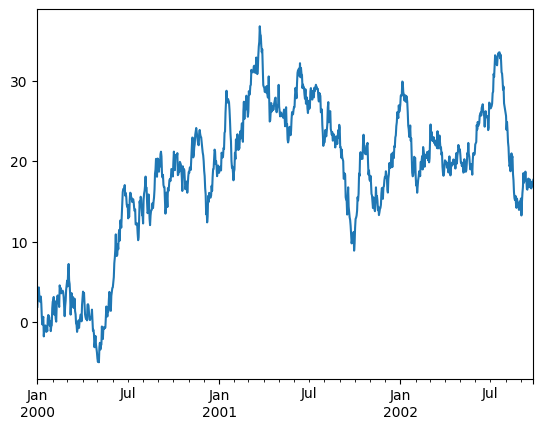

In [159]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

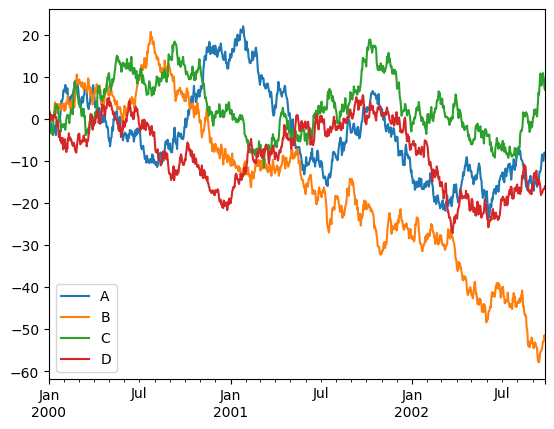

In [160]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')